# Spark Streaming

In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext

# Create a local StreamingContext with two working thread and batch interval of 1 second
sc = SparkContext("local[2]", "NetworkWordCount")
ssc = StreamingContext(sc, 1)

In [2]:
# Create a DStream that will connect to hostname:port, like localhost:9999
# Firewalls might block this!
lines = ssc.socketTextStream("localhost", 9999)

In [3]:
# Split each line into words
words = lines.flatMap(lambda line: line.split(" "))

In [4]:
# Count each word in each batch
pairs = words.map(lambda word: (word, 1))
wordCounts = pairs.reduceByKey(lambda x, y: x + y)

# Print the first ten elements of each RDD generated in this DStream to the console
wordCounts.pprint()

Now we open up a Unix terminal and type:

         $ nc -lk 9999
     $ hello world any text you want
     
With this running run the line below, then type Ctrl+C to terminate it.

In [5]:
ssc.start()             # Start the computation
ssc.awaitTermination()  # Wait for the computation to terminate

-------------------------------------------
Time: 2017-03-29 14:31:46
-------------------------------------------

-------------------------------------------
Time: 2017-03-29 14:31:47
-------------------------------------------

-------------------------------------------
Time: 2017-03-29 14:31:48
-------------------------------------------

-------------------------------------------
Time: 2017-03-29 14:31:49
-------------------------------------------

-------------------------------------------
Time: 2017-03-29 14:31:50
-------------------------------------------

-------------------------------------------
Time: 2017-03-29 14:31:51
-------------------------------------------
('world', 1)
('hello', 1)

-------------------------------------------
Time: 2017-03-29 14:31:52
-------------------------------------------

-------------------------------------------
Time: 2017-03-29 14:31:53
-------------------------------------------

-------------------------------------------
Time: 2017

KeyboardInterrupt: 

# Twitter Example
In order to use all of this though, we need to setup a Developer API acocunt with Twitter and create an application to get credentials. Review the video for instructions on how to do this or if you are already familiar with it, just get the credentials from: 

    https://apps.twitter.com/
    
Once you have that you also need to install python-twitter, a python library to connect your Python to the twitter dev account.


In [1]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [2]:
# Can only run this once. restart your kernel for any errors.
sc = SparkContext()

In [3]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [4]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [5]:
lines = socket_stream.window( 20 )

In [6]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [7]:

( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

### run TweetRead.py

In [8]:
ssc.start()    

In [9]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
# Only works for Jupyter Notebooks!
%matplotlib inline 

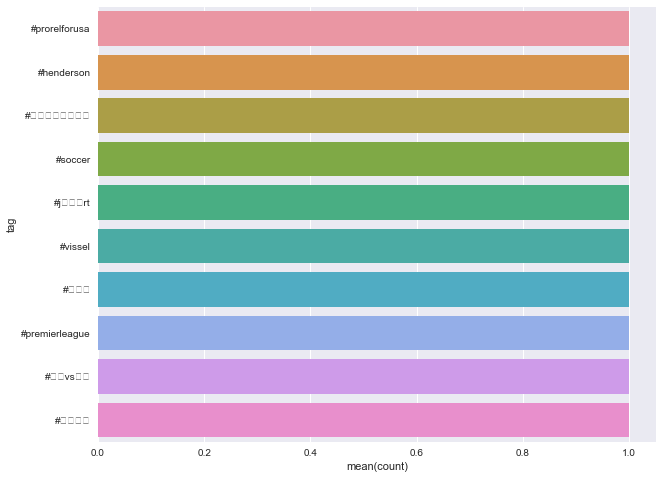

In [10]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    sns.plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    sns.plt.show()
    count = count + 1

In [11]:
ssc.stop()